<a href="https://colab.research.google.com/github/DimitrisReppas/Analysis-and-prediction-of-stock-prices/blob/main/Deep_Learning_Project_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Project: Data Analysis

## Load libraries and data

In [ ]:
!pip install mplfinance

     |████████████████████████████████| 62 kB 486 kB/s 


In [ ]:
import pandas as pd
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.lines as mlines
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from mplfinance.original_flavor import candlestick_ohlc

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!gdown --id 1TS-Jluy0_40MkIJkF9wUP1Xih6e1M35p
!unzip cac40.zip -d cac40

cac40 = pd.read_csv('/content/cac40/preprocessed_CAC40.csv', 
                   usecols = ['Name','Date','Open','Closing_Price','Daily_High','Daily_Low','Volume']
                  )

Downloading...
From: https://drive.google.com/uc?id=1TS-Jluy0_40MkIJkF9wUP1Xih6e1M35p
To: /content/cac40.zip
2.59MB [00:00, 72.0MB/s]
Archive:  cac40.zip
  inflating: cac40/CAC40_stocks_2010_2021.csv  
  inflating: cac40/preprocessed_CAC40.csv  


In [ ]:
stock = "TOTAL"
data = cac40[cac40['Name'] == stock]
# Converting 'Date' to datetime object
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

## Taking a first look at our data

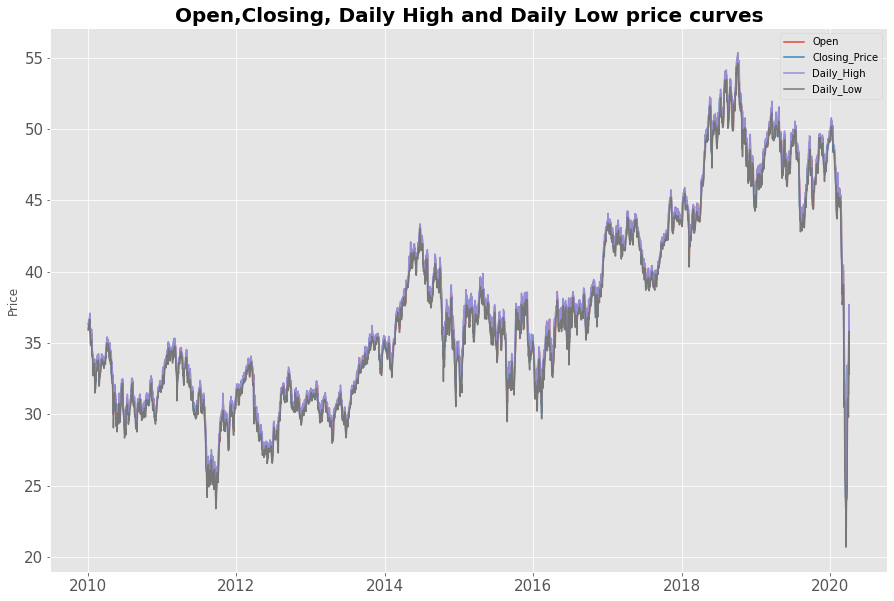

In [ ]:
fig, ax = plt.subplots()
ax.plot(data["Date"], data["Open"], label="Open")
ax.plot(data["Date"], data["Closing_Price"], label="Closing_Price")
ax.plot(data["Date"], data["Daily_High"], label="Daily_High")
ax.plot(data["Date"], data["Daily_Low"], label="Daily_Low")
ax.set_ylabel("Price")
ax.set_title("Open,Closing, Daily High and Daily Low price curves", fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.legend()
fig.show()

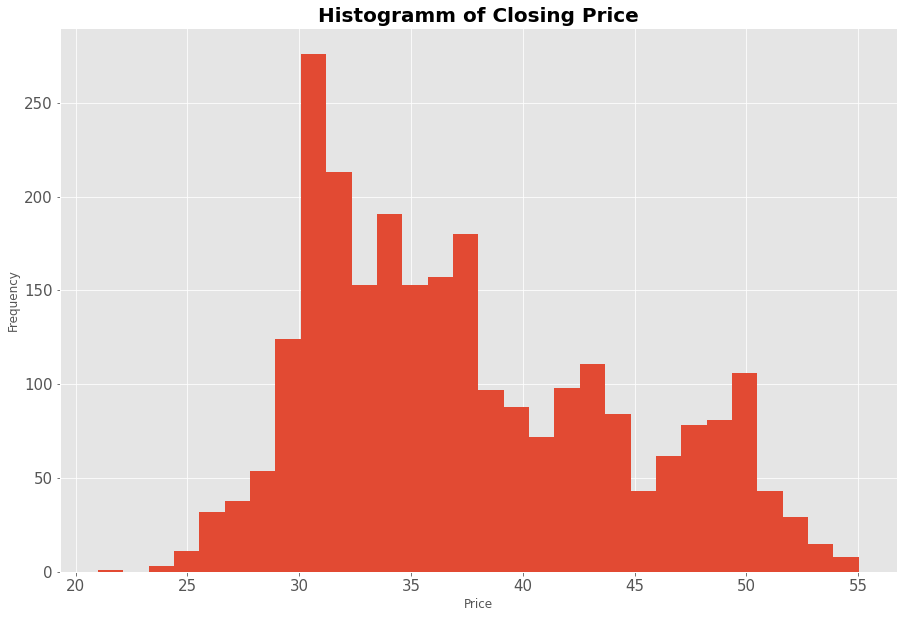

In [ ]:
data.Closing_Price.plot(kind = "hist", bins = 30)
plt.xlabel("Price")
plt.title("Histogramm of Closing Price", fontsize = 20, fontdict=dict(weight='bold'))
plt.show()

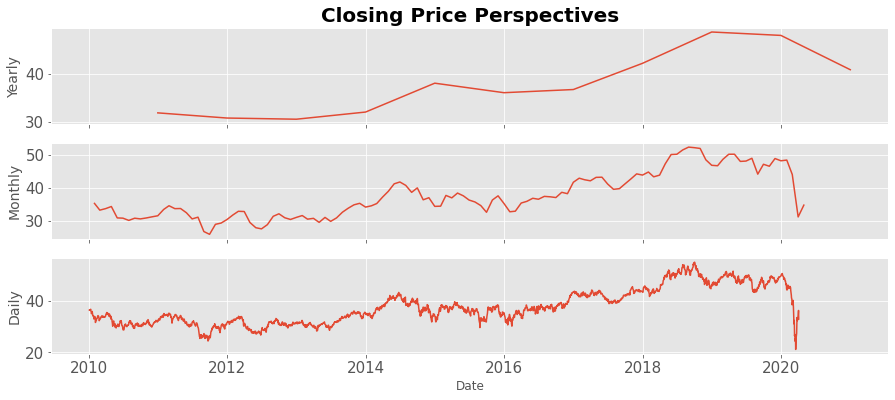

In [ ]:
#Create plot
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15, 6), sharex=True)

# Aggregating the Time Series to a yearly scaled index
y = data[['Date','Closing_Price']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1Y').mean()
y['Date'] = y.index

# Plot the yearly Volume Lineplot
sns.lineplot(y['Date'], y['Closing_Price'], ax=ax1)

# Aggregating the Time Series to a monthly scaled index
y = data[['Date','Closing_Price']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()
y['Date'] = y.index

# Plot the Monthly Volume Lineplot
sns.lineplot(y['Date'], y['Closing_Price'], ax=ax2)

# Aggregating the Time Series to a daily scaled index
y = data[['Date','Closing_Price']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1D').mean()
y['Date'] = y.index

# Plot the daily Volume Lineplot
sns.lineplot(y['Date'], y['Closing_Price'], ax=ax3)

ax1.set_title('Closing Price Perspectives', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax1.set_ylabel('Yearly', fontsize = 14)
ax2.set_ylabel('Monthly', fontsize = 14)
ax3.set_ylabel('Daily', fontsize = 14)
# ax1.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))
# plt.tick_params(axis='y', which='major', labelsize=9)
# plt.tick_params(axis='x', which='major', labelsize=9)
plt.show()

In [ ]:
# Replace , by . so Volume can be converted as float
data['Volume'] = data['Volume'].apply(lambda x : str(x))
data['Volume'] = pd.to_numeric(data['Volume'].apply(lambda x : x.replace(',','',1)))

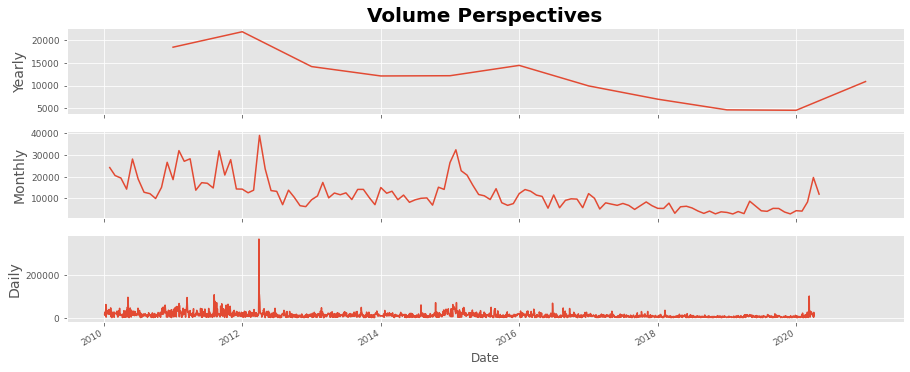

In [ ]:
#Create plot
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15, 6), sharex=True)

# Aggregating the Time Series to a yearly scaled index
y = data[['Date','Volume']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1Y').mean()
y['Date'] = y.index

# Plot the yearly Volume Lineplot
sns.lineplot(y['Date'], y['Volume'], ax=ax1)

# Aggregating the Time Series to a monthly scaled index
y = data[['Date','Volume']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()
y['Date'] = y.index

# Plot the Monthly Volume Lineplot
sns.lineplot(y['Date'], y['Volume'], ax=ax2)

# Aggregating the Time Series to a daily scaled index
y = data[['Date','Volume']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1D').mean()
y['Date'] = y.index

# Plot the daily Volume Lineplot
sns.lineplot(y['Date'], y['Volume'], ax=ax3)

ax1.set_title('Volume Perspectives', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax1.set_ylabel('Yearly', fontsize = 14)
ax2.set_ylabel('Monthly', fontsize = 14)
ax3.set_ylabel('Daily', fontsize = 14)
# ax1.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))
for ax in [ax1, ax2, ax3]:
  ax.tick_params(axis='y', which='major', labelsize=9)
  ax.tick_params(axis='x', which='major', labelsize=9)

fig.autofmt_xdate()
plt.show()

## Autocorrelation

**Autocorrelation** measures the linear relationship between lagged values of a time series, for example between yt and yt−1. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

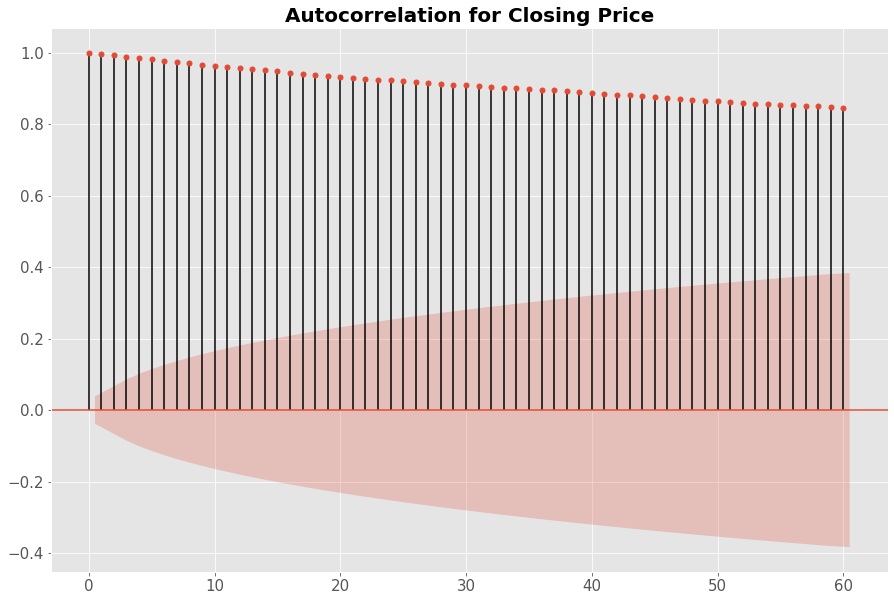

In [ ]:
fig = plot_acf(data['Closing_Price'].tolist(), lags=60, fft=False);
fig.get_axes()[0].set_title("Autocorrelation for Closing Price", fontsize = 20, fontdict=dict(weight='bold'))
fig.show()

A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot. It plots the observation at time t on the x-axis and the lag1 observation (t-1) on the y-axis.

* If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.

* If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.

Either relationship is good as they can be modeled.

* More points tighter into the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship.

* A ball in the middle or a spread across the plot suggests a weak or no relationship.

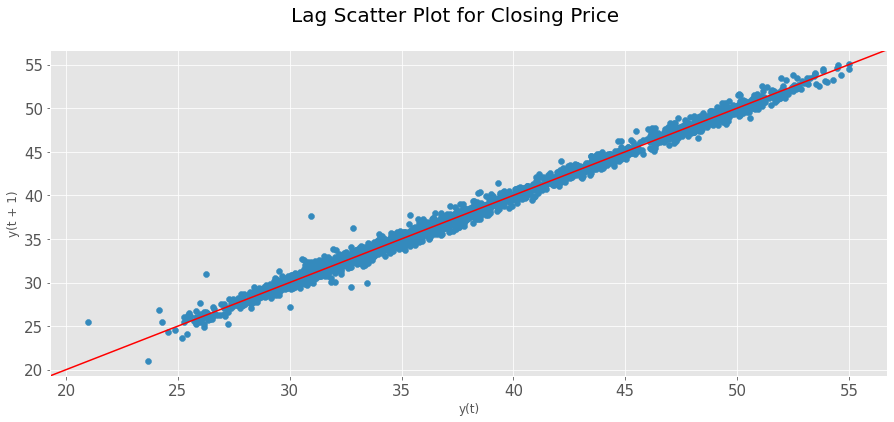

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15, 6))
fig.suptitle("Lag Scatter Plot for Closing Price", fontsize = 20, fontdict=dict(weight='bold'))
lag_plot(data['Closing_Price'], ax=ax)

line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

# line = mlines.Line2D([1, 0], [0, 1], color='red')
# transform = ax.transAxes
# line.set_transform(transform)
# ax.add_line(line)

fig.show()

## Trend and Seasonality

**Trend** (long term movement): When the series increases (or decreases) over the entire length of time.

**Seasonality** in sime series data, is the presence of variations that occur at specific regular intervals less than a year, such as weekly, monthly, or quarterly.

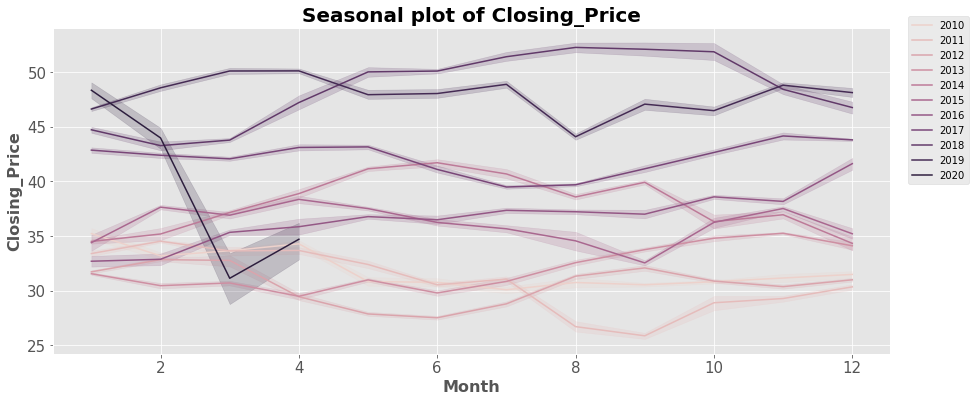

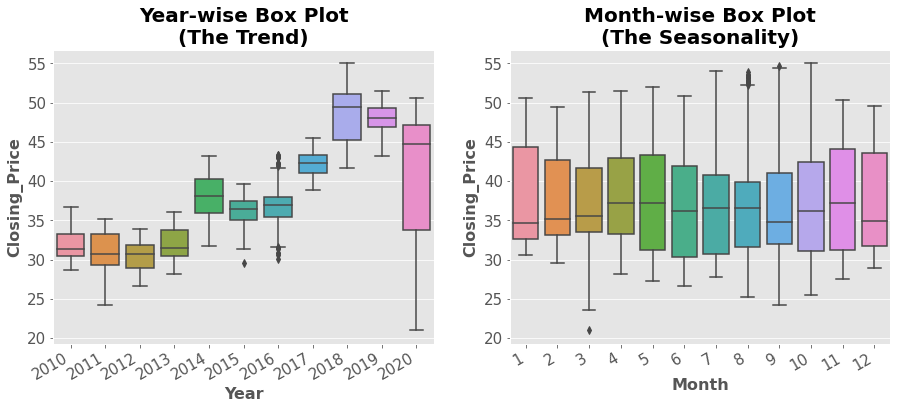

In [ ]:
#@title Select a feature to test for trend and seasonality { run: "auto", vertical-output: true, form-width: "50%", display-mode: "form" }
variable = "Closing_Price" #@param ["Closing_Price", "Volume", "Open", "Daily_High", "Daily_Low"] {allow-input: true}
fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(data['Month'], data[variable], hue = data['Year'])
ax.set_title(f'Seasonal plot of {variable}', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel(f'{variable}', fontsize = 16, fontdict=dict(weight='bold'))
ax.legend(labels = [str(2010+i) for i in range(11)], bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(data['Year'], data[variable], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel(f'{variable}', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(data['Month'], data[variable], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel(f'{variable}', fontsize = 16, fontdict=dict(weight='bold'))

fig.autofmt_xdate()

## Timeseries Decomposition

If we assume an additive decomposition, then we can write yt=St+Tt+Rt, where yt is the data, St is the seasonal component, Tt is the trend-cycle component and Rt is the residual component, all at period t. Also, for a multiplicative decomposition, we have yt=St∗Tt∗Rt.

The additive decomposition is the most appropriate if the magnitude of the seasonal fluctuations, or the variation around the trend-cycle, does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative decomposition is more appropriate. Multiplicative decompositions are common with economic time series, therefore we choose this type of decomposition in our analysis.

The three components are shown separately in the bottom three panels. These components can be multiplied together to reconstruct the data shown in the top panel. 

The residual component shown in the bottom panel is what is left over when the seasonal and trend-cycle components have been removed from the data.

If the seasonal component is removed from the original data, the resulting values are the “seasonally adjusted” data. For an additive decomposition, the seasonally adjusted data are given by yt−St , and for multiplicative data, the seasonally adjusted values are obtained using yt/St.




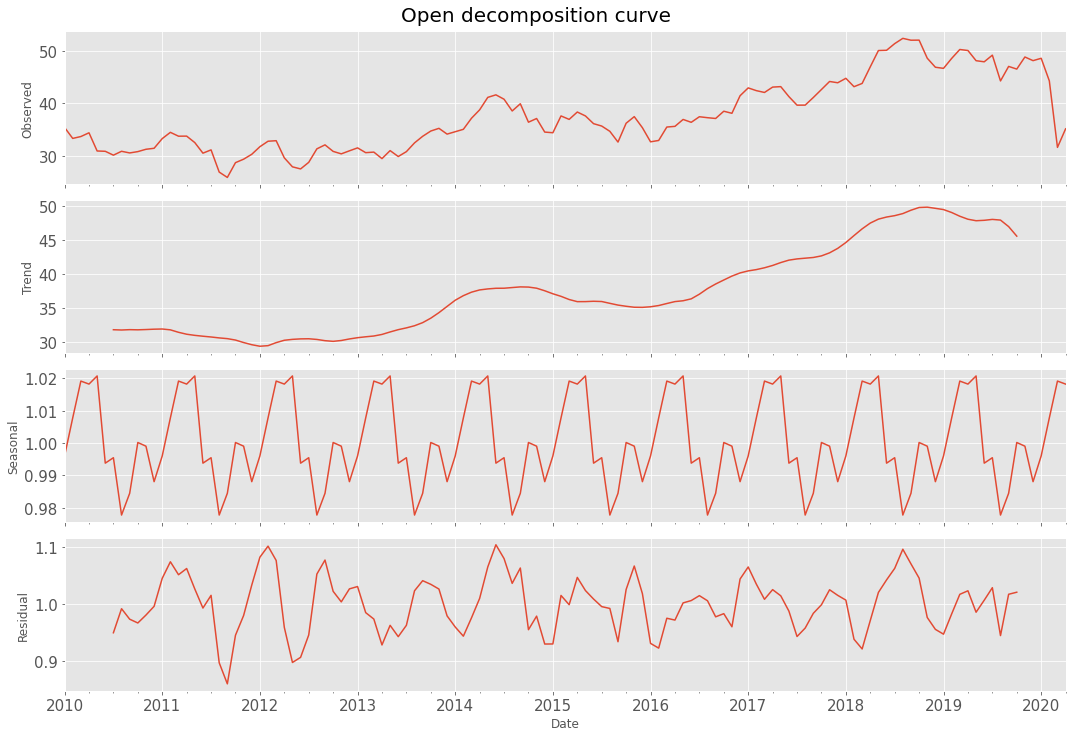

In [ ]:
#@title Choose a variable and a time perspective to decompose { run: "auto", vertical-output: true, form-width: "50%", display-mode: "form" }
variable = "Open" #@param ["Closing_Price", "Open", "Daily_High", "Daily_Low", "Volume"]
time_perspective = "monthly" #@param ["daily", "monthly"]

# Aggregating the Time Series to a monthly scaled index
y = data[['Date', variable]].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)

if time_perspective == 'monthly':
  y = y.resample('1M').mean()

# Using statistical tools of statsmodel library
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative', freq = 12)
fig = decomposition.plot()
fig.suptitle(f'{variable} decomposition curve', fontsize = 20, fontdict=dict(weight='bold'), y=1.02)
fig.show()

## Stationarity

**What is stationarity:** A stationary time series is one whose properties do not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary. On the other hand, a time series with cyclic behavior (but with no trend or seasonality) is stationary.

**What is stationarity used for:** Most statistical forecasting methods are designed to work on a stationary time series. The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary. Forecasting a stationary series is relatively easier and the forecasts are more reliable.




In [ ]:
#@title Choose a variable and a time perspective to check for stationarity with ADF test { run: "auto", vertical-output: true, form-width: "50%", display-mode: "form" }
variable = "Closing_Price" #@param ["Closing_Price", "Open", "Daily_High", "Daily_Low", "Volume"]
time_perspective = "daily" #@param ["daily", "monthly"]

# check for stationarity
def adf_test(series, title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print('Augmented Dickey-Fuller Test: {}\n'.format(title))
    # .dropna() handles differenced data
    result = adfuller(series.dropna(),autolag='AIC') 
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val
        
    # .to_string() removes the line "dtype: float64"
    print(f'{out.to_string()}\n')          
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")
        
# Aggregating the Time Series to a monthly scaled index
y = data[['Date',variable]].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
if time_perspective == 'monthly':
  y = y.resample('1M').mean()
        
adf_test(y[variable],title=variable) 

Augmented Dickey-Fuller Test: Closing_Price

ADF test statistic        -2.224263
p-value                    0.197558
# lags used                5.000000
# observations          2595.000000
critical value (1%)       -3.432872
critical value (5%)       -2.862654
critical value (10%)      -2.567363

Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


## Coefficient of variation

The coefficient of variation (CV) is a statistical measure of the relative dispersion of data points in a data series around the mean. In finance, the coefficient of variation allows investors to determine how much volatility, or risk, is assumed in comparison to the amount of return expected from investments. The lower the ratio of the standard deviation to mean return, the better risk-return trade-off.

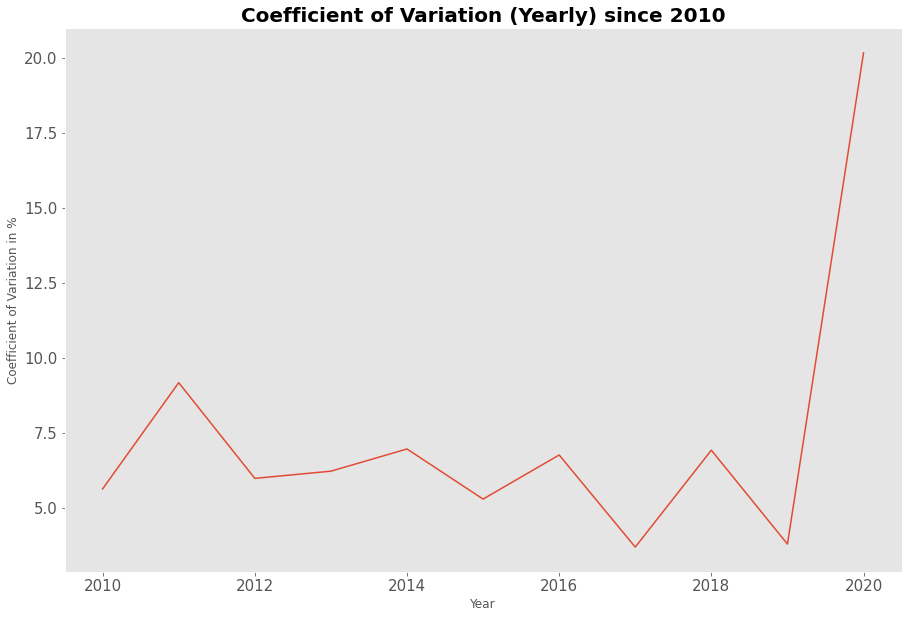

In [ ]:
y1 = data[['Date','Closing_Price']].copy()
y1.set_index('Date', inplace=True)
y1.index = pd.to_datetime(y1.index)
df_Coef = y1.groupby(y1.index.year).mean().rename(columns={'Closing_Price':'Mean'})
df_Coef = df_Coef.merge(y1.groupby(y1.index.year).std().rename(columns={'Closing_Price':'Std'}),left_index=True,right_index=True)
df_Coef['CoV_pct'] = ((df_Coef['Std']/df_Coef['Mean'])*100).round(2)
fig, ax = plt.subplots(figsize=(15,10))
df_Coef['CoV_pct'].plot();
plt.title("Coefficient of Variation (Yearly) since 2010", fontsize = 20, fontdict=dict(weight='bold'))
plt.xlabel("Year")
plt.ylabel("Coefficient of Variation in %")
plt.grid()

## Further Exploratory Analysis of Closing Price with Technical Indicators

List of technical indicators and explanation:


* **MA:** Moving averages are probably the single most widely-used technical indicator. Moving averages are primarily focused on determining likely market direction, up or down


* **Bollinger bands:** Bollinger Bands is used to define the prevailing high and low prices in a market to characterize the trading band of a financial instrument or commodity. Bollinger Bands are a volatility indicator. Bands are consists of Moving Average (MA) line, a upper band and lower band. The upper and lower bands are simply MA adding and subtracting standard deviation.

* **EMA:** Exponential moving average is a better version of a simple moving average that doesnt have SMAs lag. Moving averages just average out the data for a given time so we know how the company's closing price are trending for a given amount of days. 

* **MACD:** The Moving Average Convergence Divergence (MACD) measures the relationship of EMAs. It is the difference between two exponentially levelled moving averages, usually 12 and 26-periods. The MACD measures momentum or trend strength by using the MACD line and zero line as reference points:

    * When the MACD line crosses ABOVE the zero line, this signals an UPTREND
    * When the MACD line crosses BELOW the zero line, this signals an DOWNTREND

* **Momentum:** Momentum is perhaps the simplest and easiest oscillator (financial analysis tool) to understand and use. It is the measurement of the speed or velocity of price changes, or the rate of change in price movement for a particular asset. The formula for momentum is:
```
Momentum = V − Vx, where:
V: Latest price
Vx: Closing price
x: Number of days ago
```




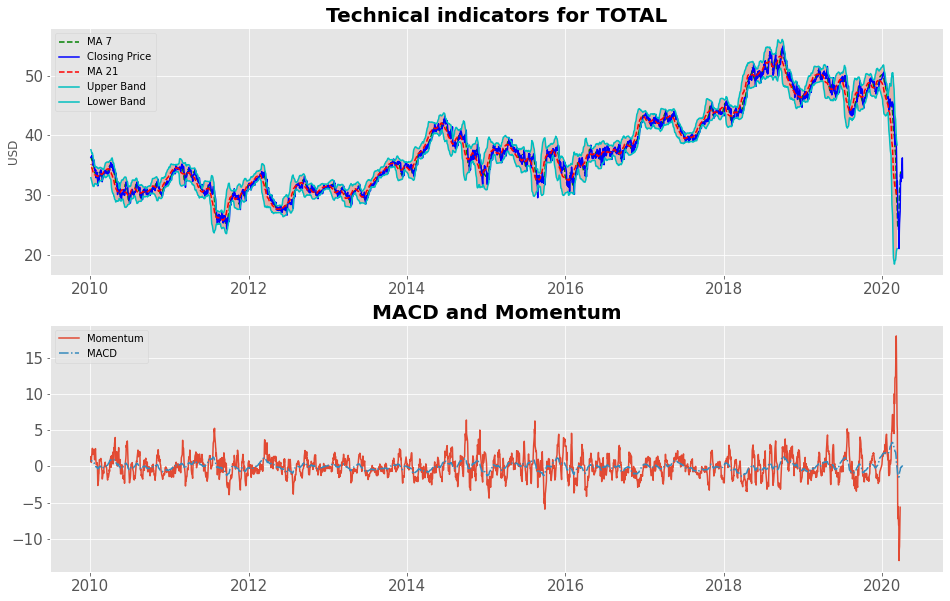

In [ ]:
def get_technical_indicators(dataset): #function to generate feature technical indicators
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Closing_Price'].rolling(window = 7).mean()
    dataset['ma21'] = dataset['Closing_Price'].rolling(window = 21).mean()
    #Create MACD
    dataset['26ema'] = dataset['Closing_Price'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Closing_Price'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])
    #Create Bollinger Bands
    dataset['20sd'] = dataset['Closing_Price'].rolling(window = 20).std()
    dataset['upper_band'] = (dataset['Closing_Price'].rolling(window = 20).mean()) + (dataset['20sd']*2)
    dataset['lower_band'] = (dataset['Closing_Price'].rolling(window = 20).mean()) - (dataset['20sd']*2)
    #Create Exponential moving average
    dataset['ema'] = dataset['Closing_Price'].ewm(com=0.5).mean()
    #Create Momentum
    dataset['momentum'] = dataset['Closing_Price'].rolling(window=10).apply(lambda x: x.iat[-1] - x.iat[0])
    
    return dataset

def plot_technical_indicators(dataset):
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 10))
    
    # Plot first subplot
    ax1.plot(dataset['Date'], dataset['ma7'], label='MA 7', color='g',linestyle='--')
    ax1.plot(dataset['Date'], dataset['Closing_Price'], label='Closing Price', color='b')
    ax1.plot(dataset['Date'], dataset['ma21'], label='MA 21', color='r',linestyle='--')
    ax1.plot(dataset['Date'], dataset['upper_band'], label='Upper Band', color='c')
    ax1.plot(dataset['Date'], dataset['lower_band'], label='Lower Band', color='c')
    ax1.fill_between(dataset['Date'], dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    ax1.set_title(f'Technical indicators for {stock}', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
    ax1.set_ylabel('USD')
    ax1.legend()

    # Plot second subplot
    ax2.set_title('MACD and Momentum', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
    ax2.plot(dataset['Date'], dataset['momentum'],label='Momentum', linestyle='-')
    ax2.plot(dataset['Date'], dataset['MACD'],label='MACD', linestyle='-.')
    ax2.legend()

    fig.show()

plot_technical_indicators(get_technical_indicators(data))